In [2]:
!pip install tensorflow

In [4]:
!pip install keras

In [6]:
!pip install pydot


In [8]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [10]:
from keras.layers import Dense,Dropout
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model


In [16]:
import pandas as pd

try:
    df = pd.read_csv(r"C:\Users\Integrated\Documents\Python\Alphabets_data.csv")
except FileNotFoundError:
    print("The file was not found. Please check the file path and try again.")
else:
    print(df.head())


  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [18]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [20]:
df.isnull().sum()


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [22]:
## Normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
print(df_scaled )

           xbox      ybox     width    height     onpix      xbar      ybar  \
0     -1.057698  0.291877 -1.053277 -0.164704 -1.144013  0.544130  2.365097   
1      0.510385  1.502358 -1.053277  0.719730 -0.687476  1.531305 -1.075326   
2     -0.012309  1.199738  0.435910  1.161947  1.138672  1.531305 -0.645273   
3      1.555774  1.199738  0.435910  0.277513 -0.230939 -0.936631  0.644886   
4     -1.057698 -1.826464 -1.053277 -1.933571 -1.144013  0.544130 -0.645273   
...         ...       ...       ...       ...       ...       ...       ...   
19995 -1.057698 -1.523844 -1.053277 -1.049137 -0.687476  0.050543 -0.215220   
19996  1.555774  0.897117  1.428701  1.161947  0.225598 -1.430218  0.214833   
19997  1.033079  0.594497  0.435910  0.719730  0.682135 -0.443044  1.504991   
19998 -1.057698 -1.221224 -0.556881 -1.491354 -1.144013  0.544130 -0.215220   
19999 -0.012309  0.594497  0.435910  0.277513 -0.687476  1.037718 -1.075326   

          x2bar     y2bar     xybar    x2ybar    xy

In [24]:
## Define X and Y
X = df_scaled.values  # Features
Y = df['letter']  # Labels
print(X)
print(Y)

[[-1.0576983   0.29187713 -1.05327668 ... -0.21908163 -1.4381527
   0.12291107]
 [ 0.51038497  1.5023577  -1.05327668 ... -0.21908163  0.12008142
   1.35944092]
 [-0.01230945  1.19973756  0.43590966 ... -0.8656262  -0.26947711
   0.74117599]
 ...
 [ 1.03307939  0.59449727  0.43590966 ...  2.36709667 -0.65903564
  -2.35014863]
 [-1.0576983  -1.22122359 -0.55688123 ...  0.42746295  0.50963994
   0.12291107]
 [-0.01230945  0.59449727  0.43590966 ... -0.8656262  -0.65903564
   0.12291107]]
0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object


In [26]:
# Encode Lables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)


In [28]:
# split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16000, 16)
(4000, 16)
(16000,)
(4000,)


In [30]:
## ANN Model 
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer for classification
model.summary()


C:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
!pip install graphviz


In [34]:
plot_model(model, show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [36]:
#Initial model with  parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) ## optimizer = RMSprop or adam
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4226 - loss: 2.1619 - val_accuracy: 0.7494 - val_loss: 0.9038
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7747 - loss: 0.7961 - val_accuracy: 0.8112 - val_loss: 0.6666
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8306 - loss: 0.5960 - val_accuracy: 0.8394 - val_loss: 0.5408
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8620 - loss: 0.4813 - val_accuracy: 0.8650 - val_loss: 0.4628
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.4026 - val_accuracy: 0.8806 - val_loss: 0.4010
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8981 - loss: 0.3391 - val_accuracy: 0.8881 - val_loss: 0.3630
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9106 - loss: 0.2968 - val_accuracy: 0.9056 - val_loss: 0.3190
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9243 - loss: 0.2623 - val_accuracy: 0.

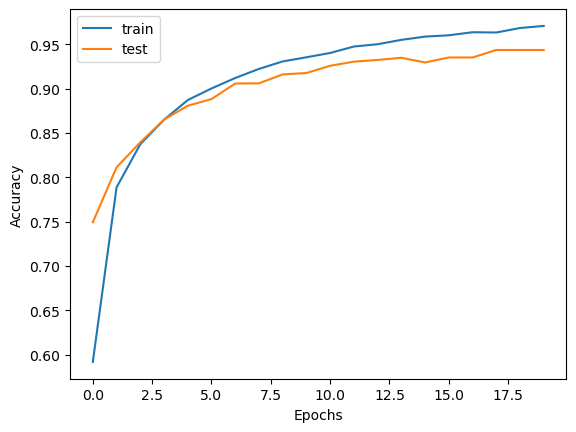

In [38]:
import matplotlib.pyplot as plt

# Assuming history.history['accuracy'] contains accuracy values
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='train')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



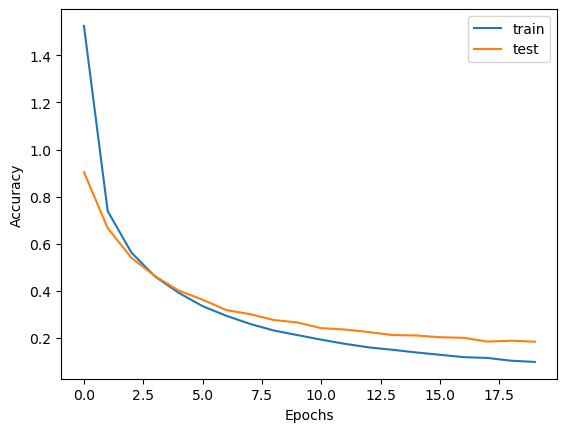

In [40]:
import matplotlib.pyplot as plt

# Assuming history.history['accuracy'] contains accuracy values
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='train')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [42]:
Y_pred=model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


In [44]:

Y_test[0]

19

In [46]:
np.argmax(Y_pred[0])

23

In [48]:
act=[]
for i in range(len(Y_test)):
    act.append(np.argmax(Y_test[i]))
    print(act)
    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [52]:
pred=[]
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))
    print(pred)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [54]:
accuracy_score(act,pred)

0.03825

In [56]:
# tuning the best model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model creation function
def create_model(optimizer='RMSprop'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Print the best result
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


C:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regula

Best: 0.9334374291719066 using {'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}


In [57]:
import tensorflow as tf
print(tf.__version__)



2.18.0


In [58]:
pip install --upgrade tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 1.8/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 2.4/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 3.4/376.0 MB 3.6 MB/s eta 0:01:44
    --------------------------------------- 4.7/376.0 MB 4.0 MB/s eta 0:01:33
    --------------------------------------- 5.8/376.0 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 6.8/376.0 MB 4.3 MB/s eta 0:01:26
    --------------------------------------- 7.9/376.0 MB 4.4 MB/s eta 0:01:24
    --------------------------------------- 8.7/376.0 MB 4.4 MB/s eta 0:01:24
   - -------------------------------------- 9.7/376.0 MB 4.4 MB/s eta 0:01:23
   - -------------------------------------- 10.7/376.0 MB 4.5 MB/s eta 0:01:21

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Integrated\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [59]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [60]:
import keras
print(keras.__version__)


3.9.0


### 4. Evaluation
## Metrics Used
    To evaluate the performance of the classification model, we used the following metrics:

# Accuracy: Overall, how often the classifier is correct.
# Precision: How many of the predicted positives are truly positive.
# Recall: How many of the actual positives are captured.
# F1-Score: Harmonic mean of precision and recall, useful for imbalanced datasets.
# We also plotted accuracy and loss over epochs for training and validation sets.

## Hyperparameter Tuning Discussion
    The initial model used default hyperparameters (optimizer='adam', batch_size=32, epochs=20). Later, we applied GridSearchCV to tune the following:

    batch_size: [32, 64]
    epochs: [10, 20]
    optimizer: ['adam', 'sgd']
    The best results were obtained using the following configuration:
    print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
    Best: 0.9334374291719066 using {'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}

    

## Performance Comparison
    The tuned model demonstrated improved accuracy compared to the default model, especially in terms of validation accuracy. GridSearchCV enabled systematic tuning which helped avoid overfitting and led to a more generalized model.

## Evaluation Metrics Output
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))